In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import paramik

In [2]:
path = "CIGDataset/SplitData/"
sz = 224

In [1]:
import os, sys, math, shutil, PIL, json
import numpy as np
import tensorflow as tf
import scipy.io as sio
import keras 
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from PIL import Image
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
from collections import Counter

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 64
model = applications.resnet50.ResNet50(weights="imagenet", include_top=False, input_shape = (224,224,3))

In [26]:
def exp_decay(epoch):
   initial_lrate = 0.001
   k = 2
   lrate = initial_lrate * np.exp(k*epoch)
   return lrate

In [9]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))

In [12]:
def get_batches(dirname, gen=keras.preprocessing.image.ImageDataGenerator(), shuffle=True, batch_size=4, class_mode='categorical',
                target_size=(224,224)):
    return gen.flow_from_directory(dirname, target_size=target_size,
            class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

In [13]:
# Use batch size of 1 since we're just doing preprocessing on the CPU
val_batches = get_batches(path+'valid', shuffle=False, batch_size=batch_size)
batches = get_batches(path+'train', shuffle=False, batch_size=batch_size)

Found 632 images belonging to 16 classes.
Found 5372 images belonging to 16 classes.


In [15]:
train_datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.1,rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(path+"train",target_size=(224, 224),batch_size=batch_size,class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(path+"valid",target_size=(224, 224),batch_size=batch_size, class_mode='categorical')

Found 5372 images belonging to 16 classes.
Found 632 images belonging to 16 classes.


In [25]:
loss_history = LossHistory()
lrate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lrate]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit_generator(train_generator, 
   validation_data = validation_generator, 
   epochs=30, 
   callbacks=callbacks_list, 
   verbose=2)

NameError: name 't' is not defined

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [7]:
len(model.layers)

174

In [12]:
def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.resnet50.ResNet50(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
    np.save(open('CIGDataset/SplitData/models/KerasTest/bottleneck_features_train.npy', 'w'),
            bottleneck_features_train)
    print("Train features saved")

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    np.save(open('CIGDataset/SplitData/models/KerasTest/bottleneck_features_validation.npy', 'w'),
            bottleneck_features_validation)
    print("Val features saved")

In [10]:
train_data_dir = "CIGDataset/SplitData/train/"
validation_data_dir = "CIGDataset/SplitData/valid/"
img_width = 224;
img_height = 224;
batch_size = 32;

nb_train_samples = 5372;
nb_validation_samples = 632;

In [11]:
save_bottlebeck_features()

Found 5372 images belonging to 16 classes.


TypeError: write() argument must be str, not bytes

In [36]:
import pandas as pd

shelfDf = pd.read_fwf('stats/ShelfStatDF_354.txt')

In [32]:
shelfDf.set_index([shelfDf['Unnamed: 0'].tolist()], inplace=True)
shelfDf.drop(columns = ['Unnamed: 0'], inplace = True)

In [33]:
tDf = shelfDf.loc[['Kent','Lark','Other']]

In [34]:
tDf

,Mean,Std. Dev,Median,Q1,Q3
Kent,0.074859,0.011014,0.072859,0.067260,0.080503
Lark,0.077579,0.012285,0.077909,0.066759,0.086203
Other,0.071471,0.014313,0.067664,0.061915,0.076996


In [38]:
tDf.index.tolist()[0]

'Kent'

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [24]:
path = "/data1/paritosh.pandey/static/results/50d10b1505274432a23e8116a21d9ff5///result_1.jpg"
im = cv.imread(path)

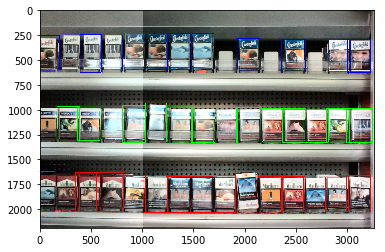

In [25]:
im = im[:,:,::-1]
plt.imshow(im, interpolation='nearest', aspect='auto')

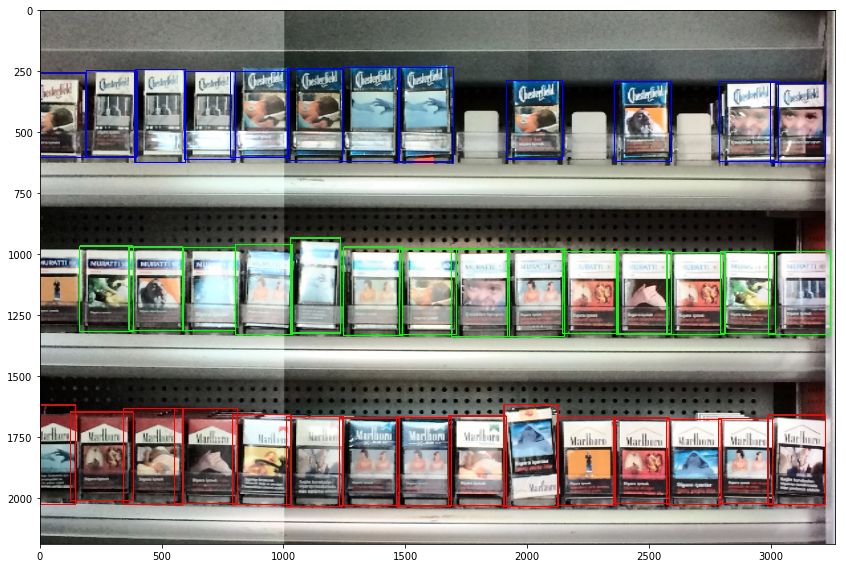

In [26]:
fig, ax = plt.subplots(figsize=(25, 8))
ax.imshow(im, interpolation='nearest')
plt.tight_layout()